In [11]:
%pylab inline

# Import all packages and libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image, display 

# we'll use urllib for get images
import urllib.request
def url_to_array(url):
    request = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(request.read()), dtype=np.uint8)
    return arr



# get the images
waldo_url = 'http://farm4.staticflickr.com/3790/9137762420_b851165bf4_o.png'
waldo_arr = url_to_array(waldo_url)
waldo_img = cv2.imdecode(waldo_arr, cv2.IMREAD_COLOR)

waldo_img = waldo_img[:,:,[2,1,0]] #BGR to RGB


scene_url = 'http://farm6.staticflickr.com/5494/9137763452_8f51208ab2_o.png'
#scene_url = 'http://www.thehighdefinite.com/wp-content/uploads/2009/08/waldo.png'
scene_arr = url_to_array(scene_url)
scene_img = cv2.imdecode(scene_arr, cv2.IMREAD_COLOR)
scene_img = scene_img[:,:,[2,1,0]] #BGR to RGB

# cv2.matchTemplate: scan a template image through a scene image and get score for match at each position
# http://docs.opencv.org/modules/imgproc/doc/object_detection.html?highlight=matchtemplate#cv2.matchTemplate
scores = cv2.matchTemplate(scene_img,                  # scene image  
                           waldo_img,                  # template image
                           method=cv2.TM_CCORR_NORMED  # see docs for methods
                          )


Populating the interactive namespace from numpy and matplotlib


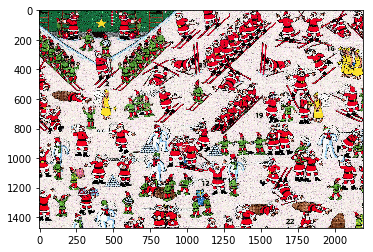

In [12]:
# Plot scene image
plt.imshow(scene_img)

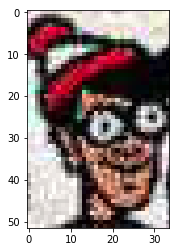

In [13]:
# Plot Waldo Image
plt.imshow(waldo_img)

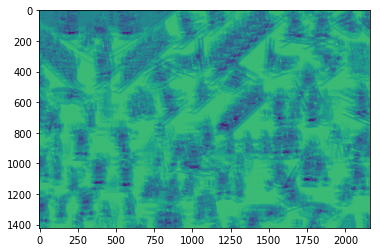

In [4]:
imshow(scores)

In [14]:
# Compute min max location of scores
min_score, max_score, (min_x, min_y), (max_x, max_y) = cv2.minMaxLoc(scores)
corner_topL = (max_x, max_y)
corner_botR = (corner_topL[0]+waldo_img.shape[1], corner_topL[1]+waldo_img.shape[0])

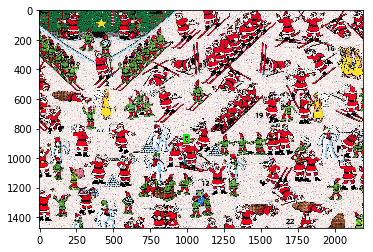

In [15]:
# cv2.rectangle: draw a rectangle on an image
# http://docs.opencv.org/modules/core/doc/drawing_functions.html?highlight=rectangle#cv2.rectangle
scene_img_highlighted = scene_img[:,:,[0,1,2]].copy()
cv2.rectangle(scene_img_highlighted,  # image to add a rectangle to
              corner_topL,            # upper left corner of rectangle
              corner_botR,            # lower right corner of rectangle
              (0,255,0),              # rgb tuple for rectangle color
              10                      # rectangle stroke thickness (in pixels)
             )
plt.imshow(scene_img_highlighted)

In [7]:
def best_match(template_img, scene_img, minsize, maxsize):
    """ Get the best match for a template image within a scene image,
        rescaling the template width between minsize and maxsize
        while maintaining the aspect ratio.
        Returns two 2-tuples of ints:
            corner is the (x,y) position of the upper-left corner of the template in the scene
            wh is (width, height)
    """
    # widths is all the widths to try
    widths = np.arange(minsize, maxsize, dtype=int)
    # aspect_ratio is height/width of the template image
    aspect_ratio = template_img.shape[0] / float(template_img.shape[1])
    # heights is all the heights to try
    heights = np.asarray(aspect_ratio*widths, dtype=int)
    
    # best_scores will store the best score for each width
    best_scores = np.zeros(len(widths))
    # best_positions will store the best (x,y) positions of the template for each width
    best_positions = np.zeros([len(widths), 2], dtype=int)
    
    # scan widths
    for isize in range(widths.size):
        # log
        print ("resizing to width = %d" % widths[isize])
        
        # resize
        resized_template_img = cv2.resize(template_img, (widths[isize], heights[isize]))
        
        # match
        scores = cv2.matchTemplate(scene_img, resized_template_img, method=cv2.TM_CCORR_NORMED)
        
        # get best score and position
        min_score, max_score, (min_x, min_y), (max_x, max_y) = cv2.minMaxLoc(scores)
        
        # store best score and position
        best_scores[isize] = max_score
        best_positions[isize] = [max_x, max_y]
        
    # choose best overall match
    best_isize = np.argmax(best_scores)
    best_width = widths[best_isize]
    best_position = best_positions[best_isize]
    
    # plot scores
    plt.plot(widths, best_scores)
    plt.arrow(widths[best_isize], 0, 0, 1, color='r')
    plt.xlabel('template width')
    plt.ylabel('score')
    
    # return
    return tuple(best_positions[best_isize]), (widths[best_isize], heights[best_isize])

def imshow_highlighted(img, corner, wh, rgb=(0,255,0), stroke=5):
    """ Show an image with a highlighted rectangle.
        corner is a (x_upperleft, y_upperleft) tuple of ints,
        wh is a (width, height) tuple of ints,
        rgb is an optional (r,g,b) tuple (default green),
        stroke is an optional number of pixels for rectangle stroke (default 5).
    """
    # copy the image so we don't modify the original
    img_highlighted = img[:,:,[2,1,0]].copy()
    
    # add a rectangle
    cv2.rectangle(img_highlighted, corner, (corner[0]+wh[0], corner[1]+wh[1]), rgb, stroke)
    
    # show
    plt.imshow(img_highlighted)

resizing to width = 20
resizing to width = 21
resizing to width = 22
resizing to width = 23
resizing to width = 24
resizing to width = 25
resizing to width = 26
resizing to width = 27
resizing to width = 28
resizing to width = 29
resizing to width = 30
resizing to width = 31
resizing to width = 32
resizing to width = 33
resizing to width = 34
resizing to width = 35
resizing to width = 36
resizing to width = 37
resizing to width = 38
resizing to width = 39
resizing to width = 40
resizing to width = 41
resizing to width = 42
resizing to width = 43
resizing to width = 44
resizing to width = 45
resizing to width = 46
resizing to width = 47
resizing to width = 48
resizing to width = 49
resizing to width = 50
resizing to width = 51
resizing to width = 52
resizing to width = 53
resizing to width = 54
resizing to width = 55
resizing to width = 56
resizing to width = 57
resizing to width = 58
resizing to width = 59


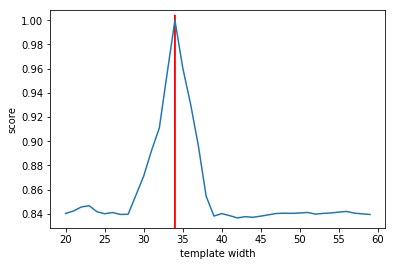

In [8]:
corner, wh = best_match(waldo_img, scene_img, 20, 60)
